In [1]:
import pybel
import openbabel
import glob

In [2]:
def globalopt(mol, debug=False, fast=False):
    pybel._builder.Build(mol.OBMol)
    mol.addh()

    ff = pybel._forcefields["uff"]
    success = ff.Setup(mol.OBMol)
    print('uff:', success)
    if not success:
        ff = pybel._forcefields["mmff94"]
        success = ff.Setup(mol.OBMol)
        print('mmff94:', success)
        if not success:
            sys.exit("Cannot set up forcefield")


    ff.ConjugateGradients(100, 1.0e-3)
    ff.WeightedRotorSearch(100, 25)
    ff.ConjugateGradients(250, 1.0e-4)
    ff.GetCoordinates(mol.OBMol)

## For converting a batch

In [3]:
count = 0
for file in glob.iglob('12/*.sdf'):
    count +=1
    print(count)
    filename = file.split("/")[-1].split(".")[0]
    print(filename)
    mol = next(pybel.readfile('sdf', file))
    mol.addh()
    globalopt(mol)
    mol.write(format = 'xyz', filename = '12/{}.xyz'.format(filename), overwrite = True)

1
TPIC-4F
uff: True
2
YF25
uff: True
3
X-PCIC
uff: True
4
YITI-4F
uff: True
5
YITI-2F
uff: True
6
Y25
uff: True
7
Y2
uff: True
8
TPQx-4F
uff: True
9
TPDCIC
uff: True
10
Y14
uff: True
11
Y9-2Br
uff: True
12
TSeTIC
uff: True
13
TTPTTT-2F
uff: True
14
TPDCNC
uff: True
15
TTz1
uff: True
16
TPTT-2F
uff: True
17
TfIF-IC
uff: True
18
Y1
uff: True
19
SN6IC
uff: True
20
SN6IC-4F
uff: True
21
UF-Qx-2Cl
uff: True
22
TTPTTT-4F
uff: True
23
TPTTT-2F
uff: True
24
ZITI-N
uff: True
25
Th-PhCHO
uff: True
26
Y22
uff: True
27
TfIF-4FIC
uff: True
28
TPQx-6F
uff: True
29
TPQ-F
uff: True
30
Y6-1O
uff: True
31
TPBT-RCN
uff: True
32
TTIC-M
uff: True
33
YITI-0F
uff: True
34
ZY-4Cl
uff: True
35
TPD3
uff: True
36
TTz2
uff: True
37
TPQ-Cl
uff: True
38
Y-T
uff: True
39
Y6-T
uff: True
40
SY1
uff: True
41
TPIC-4Cl
uff: True
42
Y1-4F
uff: True
43
ZITI-C
uff: True
44
SSTI
uff: True
45
Y18
uff: True
46
Y6-2Se
uff: True
47
SY3
uff: True
48
Y6-Se
uff: True
49
Y18-1D
uff: True
50
TIDT-BT-R2
uff: True
51
TPIC
uff: True
52


## For converting individual files

In [4]:
name = 'PbiTPD'

In [6]:
mol = next(pybel.readfile('sdf', '3_benchmarking/COi6DFIC.sdf'))

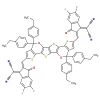

In [7]:
mol

In [8]:
mol.addh()

In [12]:
globalopt(mol)

uff: True


In [10]:
mol.write(format = 'xyz', filename = '{}.xyz'.format(name), overwrite = True)